# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [36]:
df = sns.load_dataset('penguins')

In [37]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [39]:
df =df.drop(columns =['species', 'island', 'sex'])

In [40]:
(df.isnull().sum() / len(df)) * 100

bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
dtype: float64

In [41]:
df = df.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

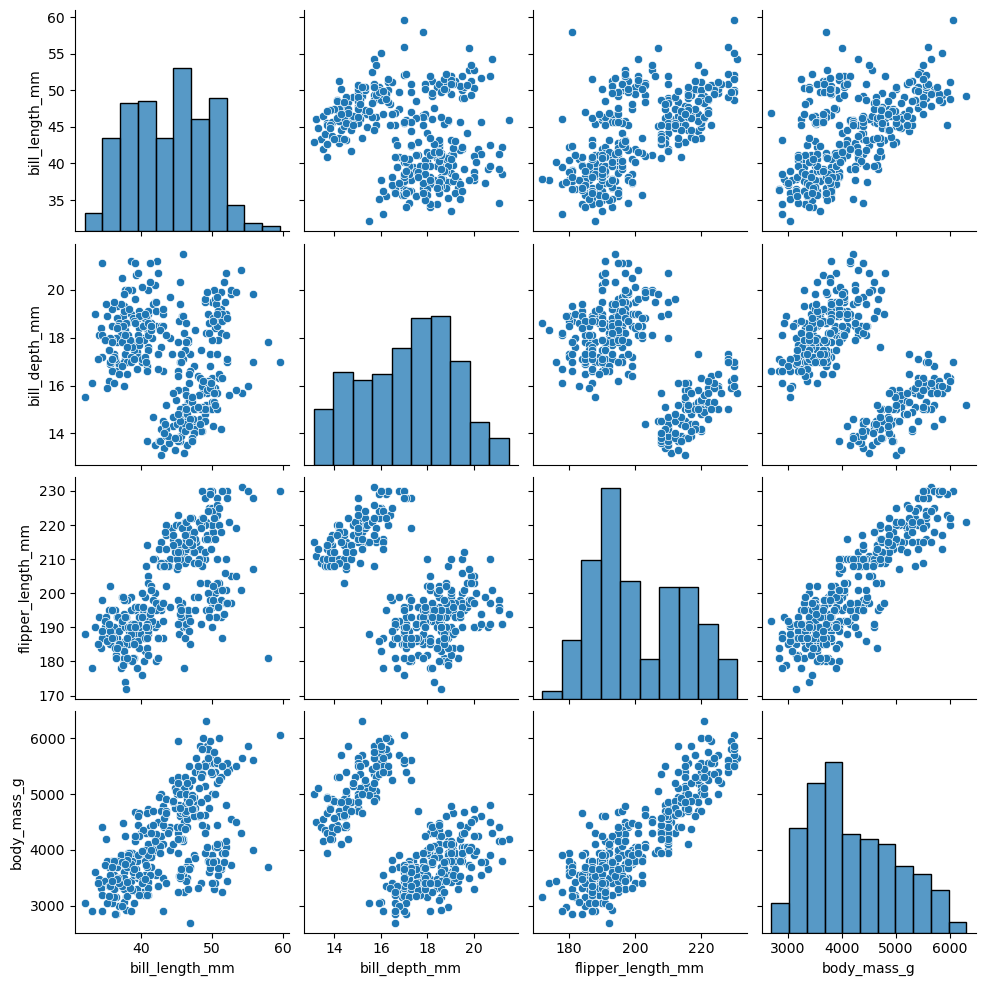

In [43]:
sns.pairplot(df)

Ao analisar os visuais gerados observa-se que a depender da combinação de variáveis é possível visualizar de forma clara três agrupamentos, como o que ocorre nas variáveis **bill_length_mm** e **bill_depth_mm**.  
Contudo, as variáveis **body_mass_g** e **bill_depth_mm** exibem apenas dois agrupamentos visiveis de forma mais clara. É importante ressaltar que os gráficos de dispersão comparam apenas duas variáveis, em um plano bidimensional, enquanto o algoritmo KMeans realiza a comparação considerando todas as variáveis presentes na base, em um plano multidimensional. 

# 3 - Realize a padronização dos dados e visualize os dados.

In [44]:
df_padronizado = df.copy()

In [45]:
colunas_padronizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
df_padronizado[colunas_padronizar] = scaler.fit_transform(df[colunas_padronizar])

In [46]:
df_padronizado

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [49]:
kmeans_especies = KMeans (n_clusters=3, n_init=10, random_state=42)
kmeans_especies.fit(df_padronizado)

C:\Users\Mylla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [50]:
centroides = kmeans_especies.cluster_centers_
centroides

array([[ 0.66097295,  0.8169259 , -0.28620559, -0.37431308],
       [ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ],
       [-1.04805941,  0.48655336, -0.89121603, -0.77061658]])

In [53]:
centroides_padronizados = kmeans_especies.cluster_centers_

centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[  47.52528736,   18.76206897,  196.89655172, 3902.01149425],
       [  47.50487805,   14.98211382,  217.18699187, 5076.01626016],
       [  38.20833333,   18.11060606,  188.40151515, 3584.65909091]])

In [54]:
labels = kmeans_especies.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

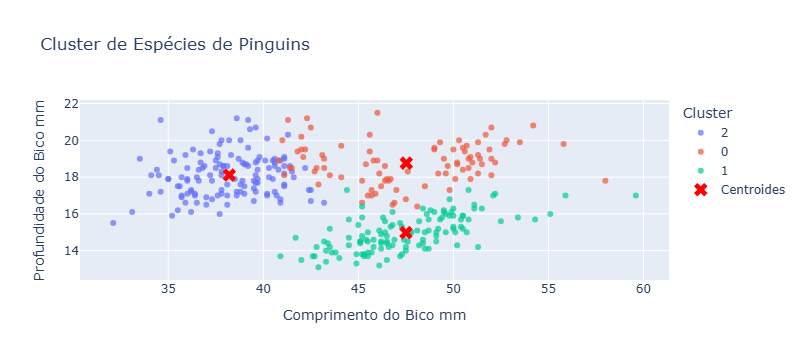

In [66]:
df_clusters = pd.DataFrame({
    'bill_length_mm' : df['bill_length_mm'],
    'bill_depth_mm' : df['bill_depth_mm'], 
    'flipper_length_mm' : df['flipper_length_mm'], 
    'body_mass_g' : df['body_mass_g'],
    'cluster' : labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_length_mm', y='bill_depth_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluster de Espécies de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=12),
                name='Centroides')

fig.update_layout(xaxis_title='Comprimento do Bico mm', yaxis_title='Profundidade do Bico mm',
                  legend_title='Cluster')

fig.show()

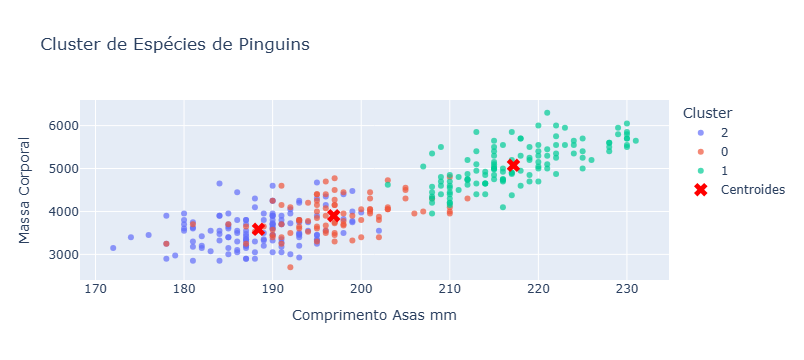

In [67]:
fig = px.scatter(df_clusters, x='flipper_length_mm', y='body_mass_g', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluster de Espécies de Pinguins')

fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=12),
                name='Centroides')

fig.update_layout(xaxis_title='Comprimento Asas mm', yaxis_title='Massa Corporal',
                  legend_title='Cluster')

fig.show()

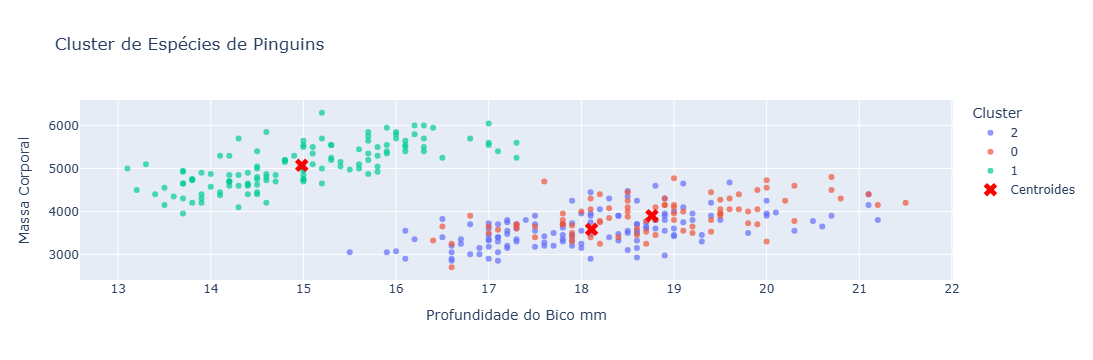

In [68]:
fig = px.scatter(df_clusters, x='bill_depth_mm', y='body_mass_g', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluster de Espécies de Pinguins')

fig.add_scatter(x=centroides_originais[:, 1], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=12),
                name='Centroides')

fig.update_layout(xaxis_title='Profundidade do Bico mm', yaxis_title='Massa Corporal',
                  legend_title='Cluster')

fig.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

A clusterização é importante para verificarmos os agrupamentos dos clientes. Pode-se utilizar isso em serviços de streaming, como Spotfy e Netflix, para agrupar os clientes conforme o genero com o que mais tem contato.  
Também é possível utilizar esse algoritmo para separar os clientes conforme seu hábito de consumo e, dessa forma, enviar comunicações de marketing mais assertivas.  
Além disso também pode ser utilizada para a detecção de anomalias como fraudes e comportamentos atípicos, para a prevenção de fraudes financeiras. 